In [11]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
# Import CSV file into Data Frame
popular_tweeters = pd.read_csv("../Resources/PopularAccounts.csv", dtype=str)

# Iterate through DataFrame
for index, row in popular_tweeters.iterrows():

    try:
        # Grab the username
        target_user = row["Screen Name"]
        # print(target_user)

        # Use the username with the Twitter API get_user
        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]

        # Get the specific column data
        user_tweets = user_account["statuses_count"]
        user_followers = user_account["followers_count"]
        user_following = user_account["friends_count"]
        user_favorites = user_account["favourites_count"]

        # Replace the row information for each
        popular_tweeters.at[index, "Real Name"] = user_real_name
        popular_tweeters.at[index, "Tweets"] = user_tweets
        popular_tweeters.at[index, "Followers"] = user_followers
        popular_tweeters.at[index, "Following"] = user_following
        popular_tweeters.at[index, "Favorites Count"] = user_favorites
    except tweepy.TweepError as e:
        print(f"exception for {row['Screen Name']}: {e}")
        popular_tweeters.drop(index=index,inplace=True)
    
# Export the new CSV
popular_tweeters.to_csv("PopularAcounts_New.csv", index=False)

# View the DataFrame
popular_tweeters.head()

exception for kanyewest: [{'code': 50, 'message': 'User not found.'}]


,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,9066,109013610,210,6118
1,justinbieber,Justin Bieber,30611,105776937,315329,3445
2,BarackObama,Barack Obama,15506,101256657,623741,11
3,Taylorswift13,Taylor Swift,88,85578644,0,441
4,rihanna,Rihanna,10075,86744841,1115,1022


In [13]:
# Calculate Averages
average_tweet_count = popular_tweeters["Tweets"].mean()
average_followers = popular_tweeters["Followers"].mean()
average_following_count = popular_tweeters["Following"].mean()
average_favorites_count = popular_tweeters["Favorites Count"].mean()

# Create DataFrame
averages = {"Average Tweet Count": average_tweet_count, 
            "Average Follower Count": average_followers, 
            "Average Following Count": average_following_count,
            "Average Favorites Count": average_favorites_count}

# Create a Dataframe of hte averages
pd.DataFrame(averages, index=[0])

,Average Favorites Count,Average Follower Count,Average Following Count,Average Tweet Count
0,1839.959184,5.005658e+07,32585.55102,32214.285714


In [14]:
# Extract Tweet Counts and Follower Counts
tweet_counts = popular_tweeters["Tweets"]
follower_counts = popular_tweeters["Followers"]
following_counts = popular_tweeters["Following"]
favorite_counts = popular_tweeters["Favorites Count"]

# Easy preview of headers
popular_tweeters.head()

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,9066,109013610,210,6118
1,justinbieber,Justin Bieber,30611,105776937,315329,3445
2,BarackObama,Barack Obama,15506,101256657,623741,11
3,Taylorswift13,Taylor Swift,88,85578644,0,441
4,rihanna,Rihanna,10075,86744841,1115,1022


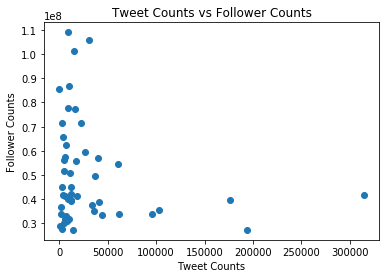

In [15]:
plt.scatter(tweet_counts, follower_counts)
plt.xlabel("Tweet Counts")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Follower Counts")
plt.show()

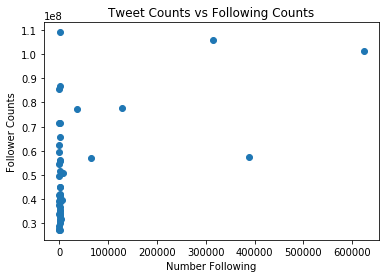

In [16]:
plt.scatter(following_counts, follower_counts)
plt.xlabel("Number Following")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Following Counts")
plt.show()

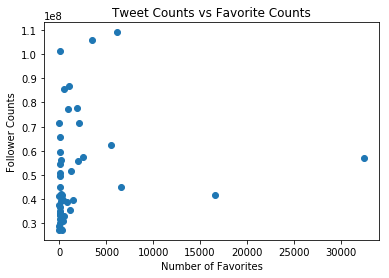

In [17]:
plt.scatter(favorite_counts, follower_counts)
plt.xlabel("Number of Favorites")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Favorite Counts")
plt.show()